## Binary classification:
- Target can be one of two options, e.g. yes or no
- Predict whether or not someone has heart disease based on their health parameters.

## Multi-class classification:
- Target can be one of more than two options
- Decide whether a photo is of food, a person or a dog.

## Multi-label classification:
- Target can be assigned more than one option
- Predict what categories should be assigned to a Wikipedia article (e.g. mathematics, science & philosophy).

In [1]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [3]:
import pandas as pd
circles = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'label': y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [4]:
# Number of values of each class
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

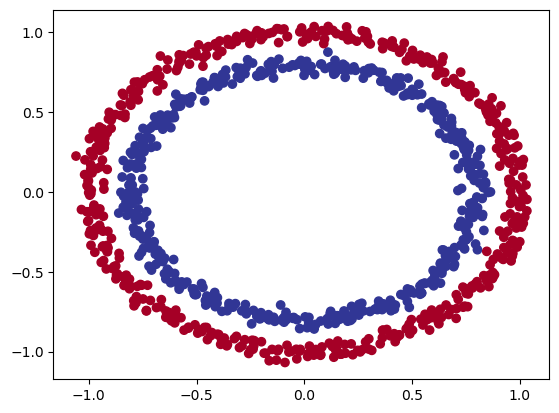

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
           y=X[:, 1],
           c=y,
           cmap=plt.cm.RdYlBu)
plt.show()
# red = 0
# blue = 1

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")
# We have 2 inputs for one output

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


In [8]:
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [9]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [11]:
from torch import nn
import torch.optim as optim

device = 'mps' if torch.backends.mps.is_available() else 'cpu'
device

'mps'

In [12]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.layer2 = nn.Linear(in_features=10, out_features=10)
        self.layer3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        return self.layer3(self.layer2(self.layer1(x)))

model0 = CircleModelV0().to(device)
model0

CircleModelV0(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [13]:
model0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5440, -0.2533],
                      [-0.5028,  0.2995],
                      [-0.0677, -0.0645],
                      [-0.4782,  0.5094],
                      [ 0.1515,  0.2200],
                      [ 0.2872,  0.1002],
                      [-0.4707, -0.0280],
                      [ 0.0863,  0.3070],
                      [ 0.0322, -0.5633],
                      [ 0.5181, -0.6285]], device='mps:0')),
             ('layer1.bias',
              tensor([-0.2062, -0.3383, -0.5471,  0.5828,  0.1728, -0.3068, -0.4544, -0.4279,
                      -0.3549,  0.2832], device='mps:0')),
             ('layer2.weight',
              tensor([[-0.2493,  0.2241, -0.0723,  0.2533, -0.1251, -0.2899,  0.0742,  0.2907,
                       -0.1873, -0.2081],
                      [-0.1422,  0.0673,  0.1659, -0.3108,  0.3124, -0.0889,  0.2750, -0.0420,
                       -0.0990,  0.1424],
                      [ 0.0427, -0.2930,  0

In [14]:
'''
# same thing with nn.Sequential():
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0
'''

'\n# same thing with nn.Sequential():\nmodel_0 = nn.Sequential(\n    nn.Linear(in_features=2, out_features=5),\n    nn.Linear(in_features=5, out_features=1)\n).to(device)\n\nmodel_0\n'

In [15]:
untrained_preds = model0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.2496],
        [-0.2133],
        [-0.0601],
        [-0.3045],
        [ 0.3919],
        [ 0.4106],
        [ 0.1546],
        [ 0.3018],
        [-0.0794],
        [-0.2059]], device='mps:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## torch.nn.BCELoss() - Creates a loss function that measures the binary cross entropy between the target (label) and input (features).
## torch.nn.BCEWithLogitsLoss() - This is the same as above except it has a sigmoid layer (nn.Sigmoid) built-in.

In [16]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(params=model0.parameters(), lr=0.1)

### Evaluation Metrics measure how right your model is, such as accuracy

In [17]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    return (correct / len(y_true)) * 100

In [18]:
y_logits = model0(X_test.to(device))[:5]
y_logits # the raw outputs of our model are often referred to as logits

tensor([[-0.2496],
        [-0.2133],
        [-0.0601],
        [-0.3045],
        [ 0.3919]], device='mps:0', grad_fn=<SliceBackward0>)

In [19]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs # now in the form of prediction probabilities
# The closer to 0, the more the model thinks the sample belongs to class 0, 
# The closer to 1, the more the model thinks the sample belongs to class 1.

tensor([[0.4379],
        [0.4469],
        [0.4850],
        [0.4245],
        [0.5967]], device='mps:0', grad_fn=<SigmoidBackward0>)

In [20]:
y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model0(X_test.to(device))[:5]))
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

y_preds.squeeze()

tensor([True, True, True, True, True], device='mps:0')


tensor([0., 0., 0., 0., 1.], device='mps:0', grad_fn=<SqueezeBackward0>)

In [21]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [22]:
torch.manual_seed(42)
epochs = 100
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # Training
    model0.train()
    y_logits = model0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model0.eval()
    with torch.inference_mode():
        test_logits = model0(X_test).squeeze()
        test_loss = loss_fn(test_logits, y_test)
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70340, Accuracy: 50.50% | Test loss: 0.69805, Test acc: 49.50%
Epoch: 10 | Loss: 0.69973, Accuracy: 50.62% | Test loss: 0.69580, Test acc: 50.00%
Epoch: 20 | Loss: 0.69755, Accuracy: 50.38% | Test loss: 0.69456, Test acc: 49.00%
Epoch: 30 | Loss: 0.69615, Accuracy: 50.50% | Test loss: 0.69385, Test acc: 49.00%
Epoch: 40 | Loss: 0.69522, Accuracy: 50.50% | Test loss: 0.69345, Test acc: 48.50%
Epoch: 50 | Loss: 0.69459, Accuracy: 50.88% | Test loss: 0.69324, Test acc: 49.00%
Epoch: 60 | Loss: 0.69415, Accuracy: 51.00% | Test loss: 0.69314, Test acc: 49.00%
Epoch: 70 | Loss: 0.69383, Accuracy: 50.50% | Test loss: 0.69311, Test acc: 47.50%
Epoch: 80 | Loss: 0.69361, Accuracy: 50.62% | Test loss: 0.69313, Test acc: 48.00%
Epoch: 90 | Loss: 0.69345, Accuracy: 50.12% | Test loss: 0.69317, Test acc: 49.50%


In [23]:
from helper_functions import plot_predictions, plot_decision_boundary

In [24]:
# # Plot decision boundaries for training and test sets
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.title("Train")
# plot_decision_boundary(model0, X_train, y_train)
# plt.subplot(1, 2, 2)
# plt.title("Test")
# plot_decision_boundary(model0, X_test, y_test)

## Building a model with non-linearity

In [25]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.layer2 = nn.Linear(in_features=10, out_features=10)
        self.layer3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model2 = CircleModelV2().to(device)
print(model2)

CircleModelV2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [26]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=0.1)

In [27]:
torch.manual_seed(42)
epochs = 1000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # Training
    model2.train()
    y_logits = model2(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model2.eval()
    with torch.inference_mode():
        test_logits = model2(X_test).squeeze()
        test_loss = loss_fn(test_logits, y_test)
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test loss: 0.69319, Test acc: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test loss: 0.69102, Test acc: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test loss: 0.68940, Test acc: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test loss: 0.68723, Test acc: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test loss: 0.68411, Test acc: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test loss: 0.67941, Test acc: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test loss: 0.67285, Test acc: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test loss: 0.66322, Test acc: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test loss: 0.64757, Test acc: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test loss: 0.62145, Test acc: 79.00%


In [28]:
model2.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model2(X_test))).squeeze()
y_preds[:10], y[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='mps:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

In [29]:
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.title("Train")
# plot_decision_boundary(model0, X_train, y_train) # model0 = no non-linearity
# plt.subplot(1, 2, 2)
# plt.title("Test")
# plot_decision_boundary(model2, X_test, y_test) # model2 = has non-linearity

In [30]:
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

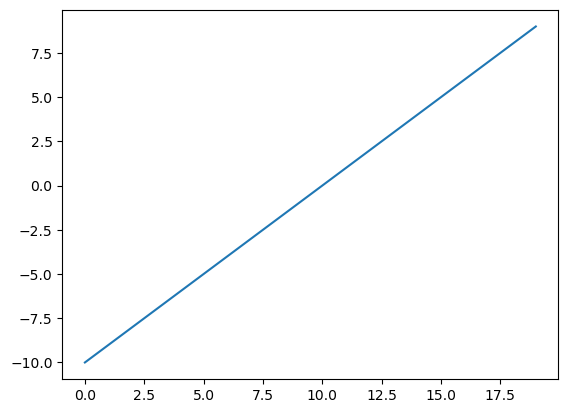

In [31]:
plt.plot(A);

In [32]:
def relu(x):
  return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

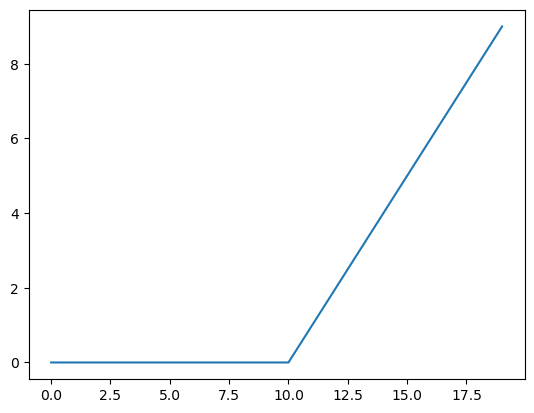

In [33]:
plt.plot(relu(A));

In [34]:
def sigmoid(x):
    den = 1 + torch.exp(-x)
    return 1 / den

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

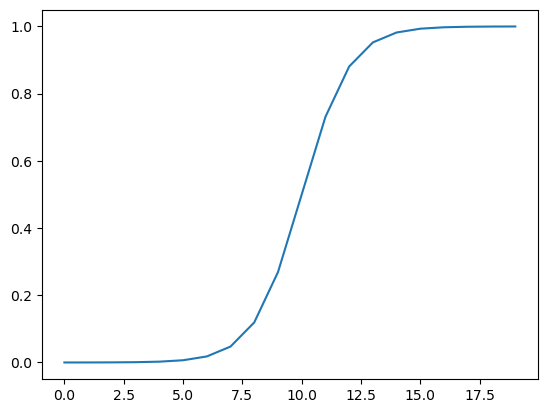

In [35]:
plt.plot(sigmoid(A));

In [36]:
from sklearn.datasets import make_blobs

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


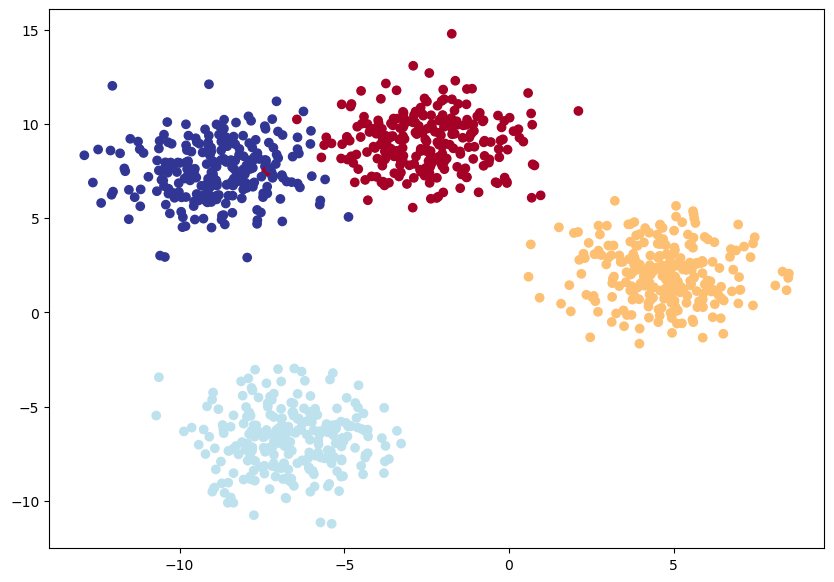

In [37]:
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [38]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

model = BlobModel(input_features=NUM_FEATURES, output_features=NUM_CLASSES, hidden_units=8).to(device)
model

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [39]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(params=model.parameters(), lr=0.1)

In [40]:
print(model(X_blob_train.to(device))[:5])
print(model(X_blob_train.to(device)[0]).shape, NUM_CLASSES)

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]], device='mps:0',
       grad_fn=<SliceBackward0>)
torch.Size([4]) 4


In [41]:
y_logits = model(X_blob_test.to(device))
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], device='mps:0',
       grad_fn=<SliceBackward0>)
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], device='mps:0',
       grad_fn=<SliceBackward0>)


In [42]:
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.1872, 0.2918, 0.1495, 0.3715], device='mps:0',
       grad_fn=<SelectBackward0>)
tensor(3, device='mps:0')


In [43]:
torch.manual_seed(42)

epochs = 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    # Train
    model.train()
    y_logits = model(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
      test_logits = model(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.04324, Acc: 65.50% | Test Loss: 0.57861, Test Acc: 95.50%
Epoch: 10 | Loss: 0.14398, Acc: 99.12% | Test Loss: 0.13037, Test Acc: 99.00%
Epoch: 20 | Loss: 0.08062, Acc: 99.12% | Test Loss: 0.07216, Test Acc: 99.50%
Epoch: 30 | Loss: 0.05924, Acc: 99.12% | Test Loss: 0.05133, Test Acc: 99.50%
Epoch: 40 | Loss: 0.04892, Acc: 99.00% | Test Loss: 0.04098, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04295, Acc: 99.00% | Test Loss: 0.03486, Test Acc: 99.50%
Epoch: 60 | Loss: 0.03910, Acc: 99.00% | Test Loss: 0.03083, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03643, Acc: 99.00% | Test Loss: 0.02799, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03448, Acc: 99.00% | Test Loss: 0.02587, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03300, Acc: 99.12% | Test Loss: 0.02423, Test Acc: 99.50%


In [44]:
model.eval()
with torch.inference_mode():
    y_logits = model(X_blob_test)

y_logits[:10]

tensor([[  4.3378,  10.3539, -14.8948,  -9.7643],
        [  5.0142, -12.0371,   3.3860,  10.6700],
        [ -5.5885, -13.3448,  20.9895,  12.7711],
        [  1.8400,   7.5600,  -8.6016,  -6.9943],
        [  8.0727,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9522,   5.0168,  13.2891],
        [ -5.9739, -10.1913,  18.8656,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5919, -18.5991,  25.5310,  17.5800],
        [  7.3143,   0.7197, -11.2018,  -1.2011]], device='mps:0')

In [45]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_preds = y_pred_probs.argmax(dim=1)

print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='mps:0')
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='mps:0')
Test accuracy: 99.5%


In [46]:
try:
  from torchmetrics import Accuracy
except:
  !pip install torchmetrics==0.9.3
  from torchmetrics import Accuracy

torch_metric_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

In [47]:
torch_metric_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='mps:0')

# Exercises

In [48]:
import torch

device = 'mps' if torch.backends.mps.is_available() else 'cpu'

RANDOM_SEED = 42

In [49]:
from sklearn.datasets import make_moons
import pandas as pd
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=1000, random_state=42, noise=0.07)
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

moons = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'labels': y})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(y_train), len(X_test), len(y_test))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

800 800 200 200
torch.Size([800, 2]) torch.Size([800]) torch.Size([200, 2]) torch.Size([200])


In [50]:
moons.head()

,X1,X2,labels
0,-0.033411,0.421391,1.0
1,0.998827,-0.442890,1.0
2,0.889592,-0.327843,1.0
3,0.341958,-0.417690,1.0
4,-0.838531,0.532375,0.0


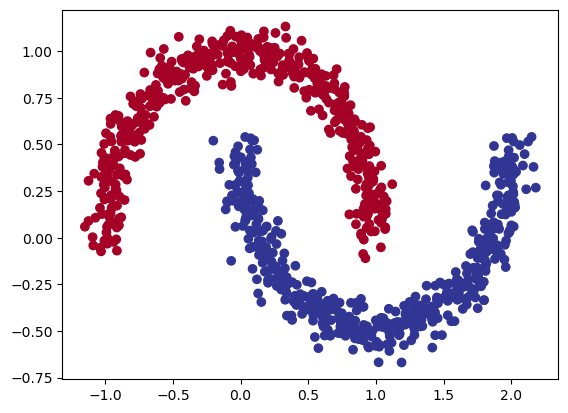

In [51]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [52]:
class MoonModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.layer2 = nn.Linear(in_features=10, out_features=10)
        self.layer3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))


model = MoonModelV0().to(device)
model

MoonModelV0(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [53]:
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

model.eval()
with torch.inference_mode():
    y_logits = model(X_test)
y_logits[:10]

tensor([[ 0.0333],
        [ 0.0339],
        [-0.0032],
        [ 0.0346],
        [ 0.0003],
        [ 0.0014],
        [ 0.0347],
        [ 0.0298],
        [-0.0088],
        [ 0.0267]], device='mps:0')

In [54]:
y_preds_probs = torch.sigmoid(y_logits)
y_preds_probs[:10].round()

tensor([[1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.]], device='mps:0')

In [55]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(params=model.parameters(), lr=0.1)

In [56]:
epochs = 1000

for epoch in range(epochs):
    model.train()
    y_logits = model(X_train).squeeze()
    y_preds = torch.sigmoid(y_logits).round()
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_preds)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_y_logits = model(X_test).squeeze()
        test_y_preds = torch.sigmoid(test_y_logits).round()
        test_loss = loss_fn(test_y_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_y_preds)
    if epoch % 100 == 0:
        print(f'Epoch={epoch} | Loss={loss} | Accuracy={acc} | Test Loss={test_loss} | Test Accuracy={test_acc}')

Epoch=0 | Loss=0.6953220963478088 | Accuracy=37.375 | Test Loss=0.6944554448127747 | Test Accuracy=49.5
Epoch=100 | Loss=0.38864612579345703 | Accuracy=81.625 | Test Loss=0.4030446410179138 | Test Accuracy=76.0
Epoch=200 | Loss=0.24289435148239136 | Accuracy=88.5 | Test Loss=0.24101945757865906 | Test Accuracy=89.5
Epoch=300 | Loss=0.20105227828025818 | Accuracy=90.875 | Test Loss=0.1915328949689865 | Test Accuracy=93.5
Epoch=400 | Loss=0.16583594679832458 | Accuracy=92.875 | Test Loss=0.15421292185783386 | Test Accuracy=94.0
Epoch=500 | Loss=0.12357869744300842 | Accuracy=95.125 | Test Loss=0.11175336688756943 | Test Accuracy=96.0
Epoch=600 | Loss=0.08451849967241287 | Accuracy=97.875 | Test Loss=0.07400970906019211 | Test Accuracy=98.5
Epoch=700 | Loss=0.05662205442786217 | Accuracy=99.0 | Test Loss=0.0481114462018013 | Test Accuracy=99.5
Epoch=800 | Loss=0.04003176465630531 | Accuracy=99.25 | Test Loss=0.032839689403772354 | Test Accuracy=99.5
Epoch=900 | Loss=0.02998902089893818 | 

In [57]:
y_logits = model(X_test)
y_preds = torch.sigmoid(y_logits).round().squeeze()
y_preds[:5].squeeze(), y_test[:5]

(tensor([1., 0., 1., 0., 1.], device='mps:0', grad_fn=<SqueezeBackward0>),
 tensor([1., 0., 1., 0., 1.], device='mps:0'))

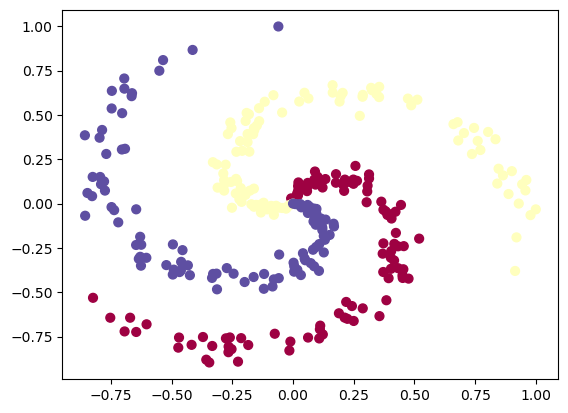

In [61]:
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()